Code qui affiche la distribution des durées de trajet.

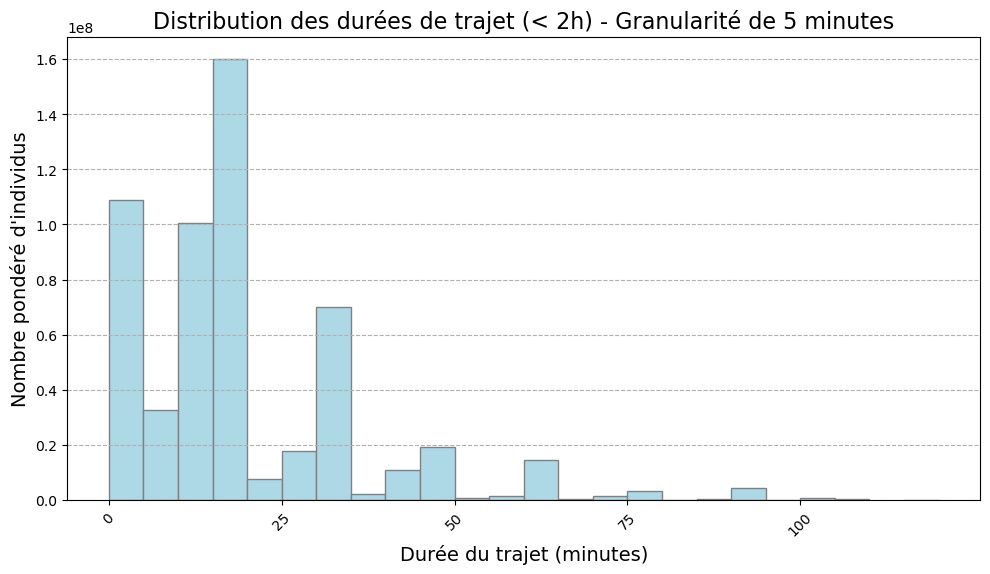

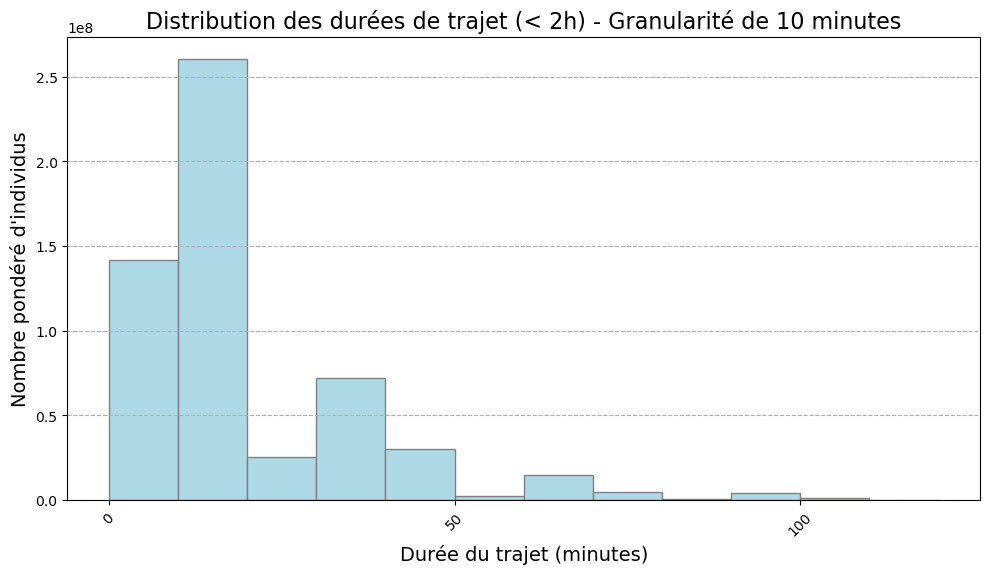

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', sep=';', encoding='ISO-8859-1')
data['HEURE_DEPART'] = data['HEURE_DEPART'].str.replace(',', '.').astype(float)
data['HEURE_ARRIVEE'] = data['HEURE_ARRIVEE'].str.replace(',', '.').astype(float)
data['POND_JOUR'] = data['POND_JOUR'].str.replace(',', '.').astype(float)

# Calcul de la durée des trajets et ajustement pour les valeurs négatives
data['DUREE_TRAJET'] = data['HEURE_ARRIVEE'] - data['HEURE_DEPART']
data['DUREE_TRAJET'] = data['DUREE_TRAJET'].apply(lambda x: x if x >= 0 else (23 + (59/60)) - data['HEURE_DEPART'])

# Filtrage pour les trajets de moins de 2 heures
data = data[data['DUREE_TRAJET'] < 2]

# Fonction pour créer et afficher les graphiques
def afficher_graphiques(data, granularites):
    for granularity in granularites:
        # Préparation des données pour le graphique
        df = data.copy()
        df['DUREE_MINUTES'] = (np.floor(df['DUREE_TRAJET'] * (60 / granularity)) * granularity).astype(int)
        grouped_data = df.groupby('DUREE_MINUTES')['POND_JOUR'].sum().reset_index()
        
        # Ajustement de la taille de la figure et création du graphique
        plt.figure(figsize=(10, 6))  # Taille ajustée pour éviter l'erreur de taille d'image
        plt.bar(grouped_data['DUREE_MINUTES'], grouped_data['POND_JOUR'], width=granularity, color='lightblue', edgecolor='grey', align='edge')
        
        plt.title(f'Distribution des durées de trajet (< 2h) - Granularité de {granularity} minutes', fontsize=16)
        plt.xlabel('Durée du trajet (minutes)', fontsize=14)
        plt.ylabel('Nombre pondéré d\'individus', fontsize=14)
        
        # Simplification des étiquettes de l'axe des x pour éviter l'erreur de taille d'image
        plt.xticks(range(0, 120, granularity * 5), rotation=45)
        
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()  # Ajustement de la disposition
        plt.show()

# Affichage des graphiques pour les granularités de 5 et 10 minutes
afficher_graphiques(data, [5, 10])


Distribution en fonction du jour de la semaine ;

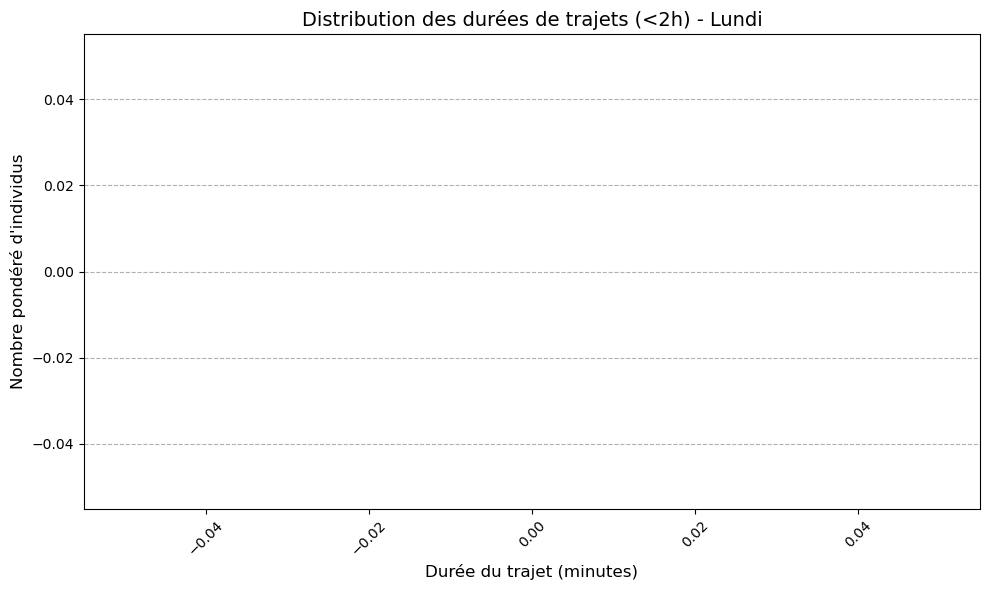

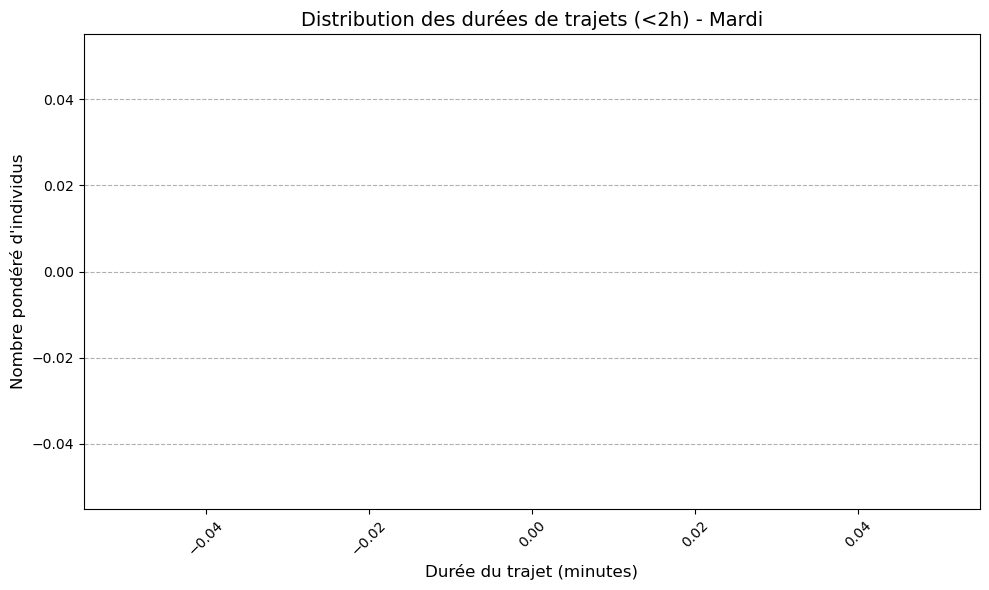

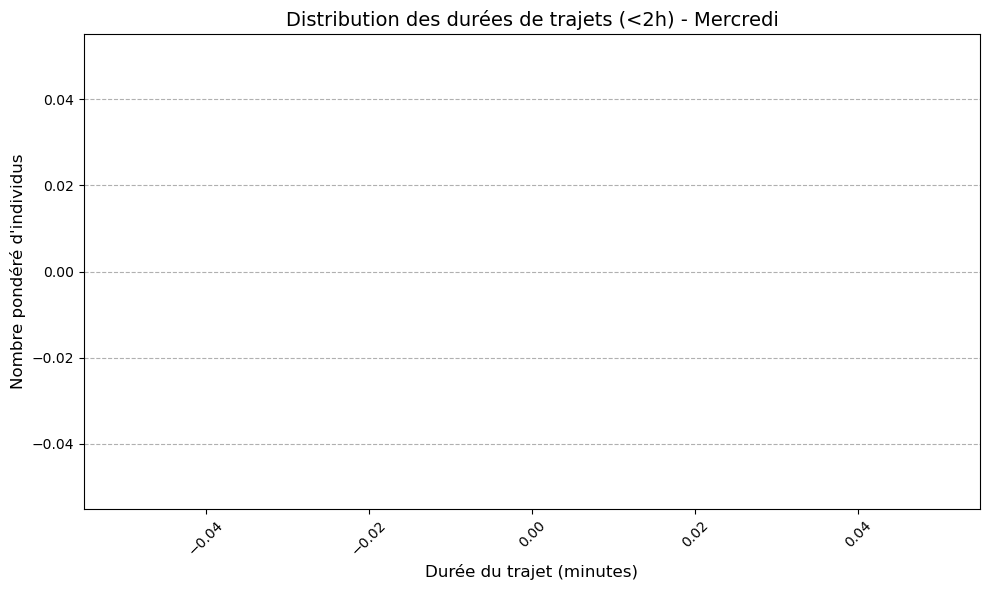

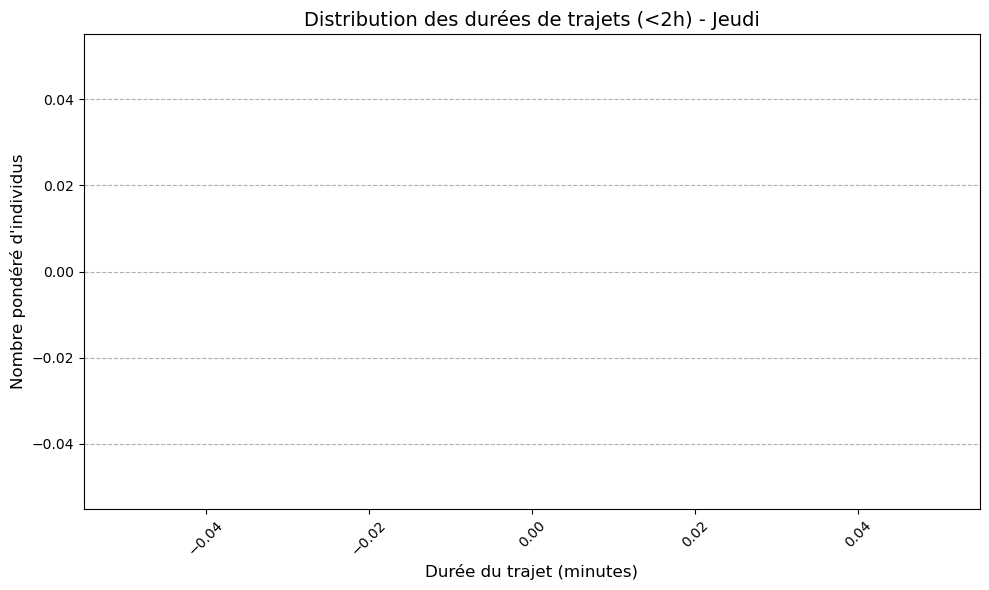

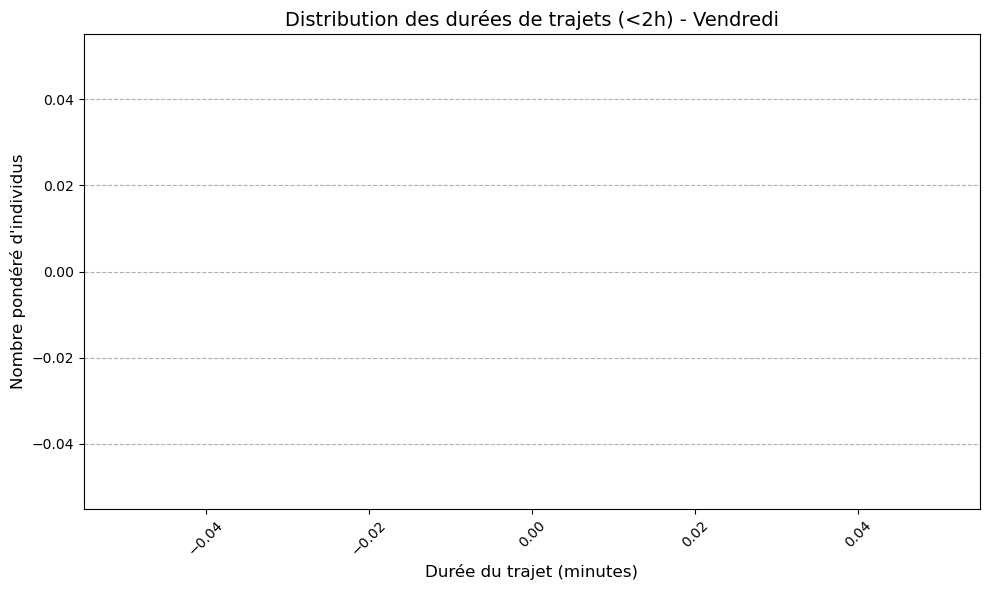

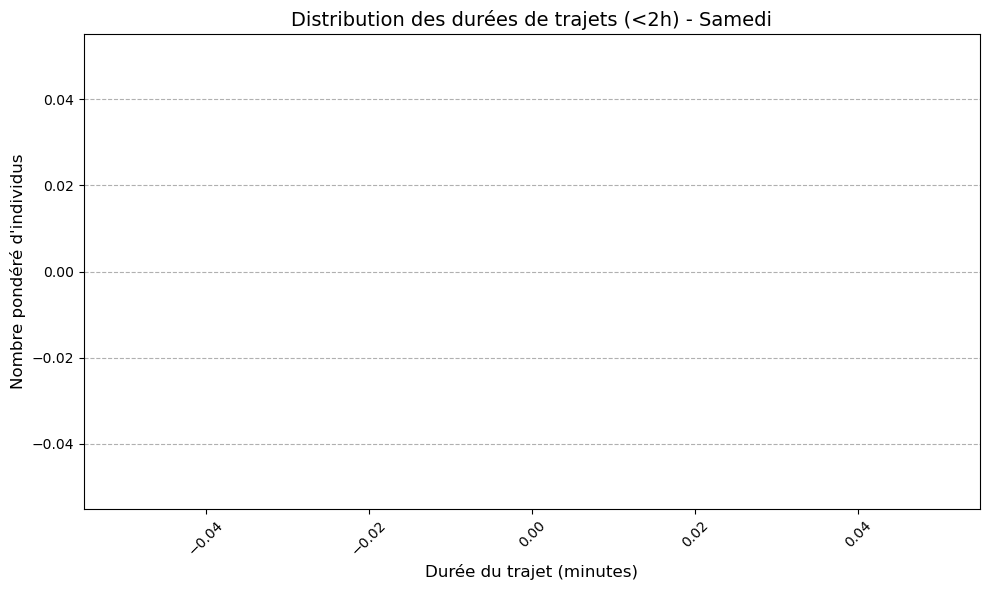

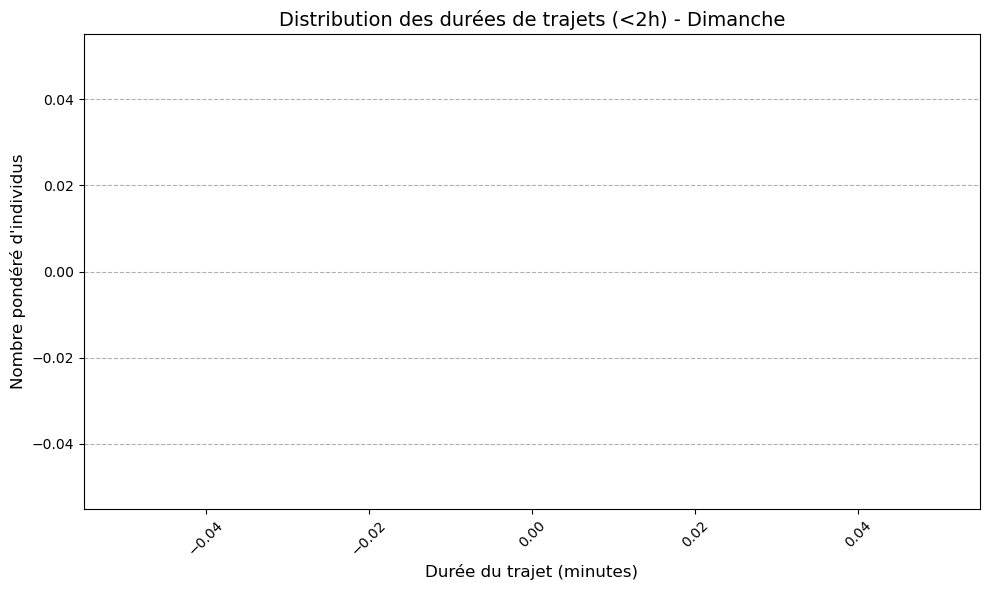